In [11]:
import string
from collections import Counter

import matplotlib.pyplot as plt

In [31]:

def get_tweets():
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('corona') \
        .setSince("2020-07-1") \
        .setUntil("2020-07-30") \
        .setMaxTweets(100)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [32]:

# reading text file
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words = cleaned_text.split()

In [33]:
# Print texts
text_tweets

[['my mom says “conora” instead of corona '],
 ['Check out UNA CORONA PARA EL MEJOR PAPA T-SHIRT - FUNNY GIFT FOR FATHER DAY #GildanG200Unisex https://ebay.us/JTs52v via @eBay #camisetaloca - buy it now and get FREE shipping or visit our store to see big deals'],
 ['time fdp, corona fdp, quarentena fdp... PQP'],
 ['se não fosse o corona e o trabalho eu iria mesmo viu?'],
 ['Mirassol perdeu um time completo por conta do corona e mesmo assim eliminou o São Paulo kkkkkkkkkkkkkkkkkkkk'],
 ['Remember someone tweeted to watch what big companies do for corona to determine when it’s safe to go back to work or a normal routine..... Netflix just added many of our classics growing up so catch me outside in 2021 '],
 ['詳細な情報がないので何の役にも立っていませんし中途半端な情報が噂となり広がりますよね 迅速に詳細をお願いいたします '],
 ['eu não aguento mais viver com o medo diario da minha familia pegar corona'],
 ['sera q eu to com corona mesmo'],
 ['Aii amiga, eu não vejo a hora dessa vacina chegar e essa porcaria de Corona acabar'],
 ['Eu achando qu

In [34]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [35]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)



Counter({' sad': 3, ' free': 1, ' happy': 1, ' lost': 1, ' adequate': 1, ' fearful': 1})


# BEFORE COVID

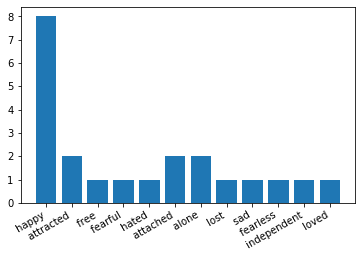

In [17]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

# AFTER COVID

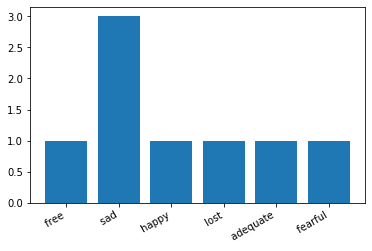

In [36]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()